# Best Practices for NLP

Creating word vectors after pre-processing natural language data

#### Load Dependencies 

In [1]:
import nltk
from nltk import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import *
from gensim.models.phrases import Phraser, Phrases
from keras.preprocessing.text import one_hot

Using TensorFlow backend.


In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Load Data 

In [5]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [6]:
from nltk.corpus import gutenberg

In [7]:
gberg_sents = gutenberg.sents()

#### Preprocess a sentence 

In [8]:
gberg_sents[4]

['She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

#### to lowercase: 

In [9]:
[w.lower() for w in gberg_sents[4]]

['she',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.']

##### remove stopwords and punctuations: 

In [10]:
stpwords = stopwords.words('english') + list(string.punctuation)

In [11]:
stpwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
 [w.lower() for w in gberg_sents[4] if w not in stpwords]

['she',
 'youngest',
 'two',
 'daughters',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 'marriage',
 'mistress',
 'house',
 'early',
 'period']

##### stem words: 

In [13]:
# truncating words for smaller corpus
stemmer = PorterStemmer()

In [14]:
 [stemmer.stem(w.lower()) for w in gberg_sents[4] if w not in stpwords]

['she',
 'youngest',
 'two',
 'daughter',
 'affection',
 'indulg',
 'father',
 'consequ',
 'sister',
 'marriag',
 'mistress',
 'hous',
 'earli',
 'period']

##### handle bigram collocations: 

In [19]:
phrases = Phrases(gberg_sents)

In [20]:
bigram = Phraser(phrases)

In [21]:
bigram.phrasegrams

{(b'Laughing', b'Brook'): (30, 14640.648674242424),
 (b'Rory', b'O'): (8, 11.209912871143551),
 (b'shall', b'sprinkle'): (11, 10.44818323121283),
 (b'thirteen', b'cities'): (7, 82.33537478365065),
 (b'his', b'neighbour'): (90, 14.760673704546635),
 (b'at', b'intervals'): (30, 31.38593852137866),
 (b'looked', b'at'): (184, 13.030752013575848),
 (b'pretty', b'guinea'): (6, 17.902414312181566),
 (b'arches', b'thereof'): (12, 168.23204570184984),
 (b'thus', b'far'): (24, 16.9342260193324),
 (b'-', b'balls'): (11, 11.646346516007533),
 (b'more', b'tolerable'): (8, 12.27318012225133),
 (b'sojourneth', b'among'): (8, 92.57799401197605),
 (b'more', b'likely'): (16, 11.176882987148272),
 (b'steering', b'oar'): (6, 1173.4743833017078),
 (b'deliver', b'us'): (23, 14.009386090764933),
 (b'-', b'sized'): (12, 27.17480853735091),
 (b'divided', b'between'): (10, 35.82806127178346),
 (b't', b'get'): (30, 10.194288227447553),
 (b'could', b'hardly'): (46, 23.719027600038913),
 (b'th', b"'"): (163, 29.61

In [22]:
"Jon lives in New York City".split()

['Jon', 'lives', 'in', 'New', 'York', 'City']

In [23]:
bigram["Jon lives in New York City".split()]

['Jon', 'lives', 'in', 'New_York', 'City']

#### Preprocess entire corpus 

In [24]:
lower_sents = []
for s in gberg_sents:
    lower_sents.append([w.lower() for w in s if w not in list(string.punctuation)])

In [25]:
lower_sents[0:6]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [26]:
# doing in one step
lower_bigram = Phraser(Phrases(lower_sents))

In [27]:
lower_bigram.phrasegrams

{(b'charles', b'hayter'): (33, 2576.962579860055),
 (b'murmur', b'against'): (7, 23.738925726841135),
 (b'thirteen', b'cities'): (7, 70.38143430465887),
 (b'unc', b'billy'): (6, 2585.6153846153843),
 (b'sea', b'coast'): (13, 23.57061046398379),
 (b'm', b'sure'): (88, 102.49120766084593),
 (b'his', b'neighbour'): (90, 13.81004514563576),
 (b'at', b'intervals'): (34, 32.97547416612164),
 (b'looked', b'at'): (184, 11.997174544178405),
 (b'sugar', b'plums'): (24, 5662.879802955666),
 (b'arches', b'thereof'): (12, 164.41141304347826),
 (b'thus', b'far'): (32, 12.641590235839274),
 (b'thirty', b'thousand'): (18, 40.06847682119205),
 (b'sun', b'shining'): (6, 13.627505743501958),
 (b'sojourneth', b'among'): (8, 86.1258362989324),
 (b'son', b'reigned'): (41, 41.84624961095549),
 (b'brunswick', b'square'): (11, 2374.2341399607585),
 (b'brother', b'rabbit'): (8, 28.11496282527881),
 (b'shan', b't'): (20, 201.14162234042553),
 (b'your', b'lordship'): (13, 41.09482692748529),
 (b'thou', b'seest'):

In [31]:
lower_bigram["siddharth lives in new york city".split()]

['siddharth', 'lives', 'in', 'new_york', 'city']

In [32]:
lower_bigram = Phraser(Phrases(lower_sents, min_count=32, threshold=64))

In [33]:
lower_bigram.phrasegrams

{(b'afar', b'off'): (52, 108.14220347465505),
 (b'burnt', b'offering'): (184, 297.524653753951),
 (b'burnt', b'offerings'): (86, 299.15702343127646),
 (b'buster', b'bear'): (142, 479.87410772225826),
 (b'captain', b'benwick'): (56, 241.49037086312987),
 (b'captain', b'wentworth'): (196, 529.8756608388247),
 (b'charles', b'hayter'): (33, 92.03437785214481),
 (b'chief', b'priests'): (65, 116.31947753846512),
 (b'colonel', b'brandon'): (132, 1313.0078125),
 (b'couldn', b't'): (89, 171.76138536935215),
 (b'cut', b'off'): (217, 129.60290535032792),
 (b'dare', b'say'): (115, 89.94000515807346),
 (b'de', b'grey'): (77, 603.2109624246722),
 (b'didn', b't'): (180, 220.51081560283686),
 (b'doesn', b't'): (53, 106.2634985949418),
 (b'don', b't'): (830, 250.30957446808512),
 (b'dr', b'bull'): (65, 680.7870294599019),
 (b'dr', b'middleton'): (40, 162.73103819257668),
 (b'drawing', b'room'): (49, 84.91494947493561),
 (b'farmer', b'brown'): (100, 386.05179596892236),
 (b'father', b'brown'): (207, 91.

In [34]:
clean_sents = []
for s in lower_sents:
    clean_sents.append(lower_bigram[s])

In [35]:
clean_sents[0:10]

[['emma', 'by', 'jane', 'austen', '1816'],
 ['volume', 'i'],
 ['chapter', 'i'],
 ['emma',
  'woodhouse',
  'handsome',
  'clever',
  'and',
  'rich',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her'],
 ['she',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  'indulgent',
  'father',
  'and',
  'had',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  's',
  'marriage',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period'],
 ['her',
  'mother',
  'had',
  'died',
  'too',
  'long',
  'ago',
  'for',
  'her',
  'to',
  'have',
  'more',
  'than',
  'an',
 

In [36]:
clean_sents[6]

['sixteen',
 'years',
 'had',
 'miss_taylor',
 'been',
 'in',
 'mr_woodhouse',
 's',
 'family',
 'less',
 'as',
 'a',
 'governess',
 'than',
 'a',
 'friend',
 'very',
 'fond',
 'of',
 'both',
 'daughters',
 'but',
 'particularly',
 'of',
 'emma']

#### Run Word2vec 

In [37]:
model = Word2Vec(sentences=clean_sents, size=64, sg=1, window=10, min_count=10, seed=42, workers=3)

In [38]:
model.save('./nlp_data/clean_gutenberg_model.w2v')

In [15]:
model = gensim.models.Word2Vec.load('./nlp_data/clean_gutenberg_model.w2v')

In [16]:
model['dog']

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.40805566, -0.18756272, -0.12458814,  0.04400261,  0.5900712 ,
        0.45355627,  0.25854588, -0.2946756 , -0.09725756, -0.14183961,
        0.28019658,  0.58698857, -0.04104517, -0.03140273,  0.25333843,
       -0.14601727,  0.07352626,  0.11169259,  0.03093989, -0.30477628,
       -0.12892236,  0.0501269 , -0.03205888, -0.39642528,  0.13563012,
       -0.22473156,  0.032488  , -0.07491783, -0.12742494, -0.29679567,
       -0.42283595,  0.1368814 ,  0.1514586 ,  0.17276858,  0.10649854,
       -0.3663222 , -0.22125642, -0.17232582,  0.0735292 , -0.15360713,
        0.39601812, -0.5182811 , -0.5195692 , -0.5829972 ,  0.4630753 ,
        0.15298563,  0.25359783, -0.01392261, -0.22783725,  0.04166099,
        0.5056475 , -0.05499135,  0.28656912,  0.08818653,  0.01860093,
        0.26990998, -0.30214846, -0.04995088,  0.20666267,  0.6298333 ,
       -0.11207908, -0.4683054 , -0.06931641, -0.36972833], dtype=float32)

In [17]:
len(model.wv.vocab)

10329

In [18]:
len(model['dog'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

#### Explore model 

In [19]:
model['ma_am']

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.6345801 , -0.09677965, -0.07791104, -0.27756825,  0.24967961,
       -0.23969623,  0.09952705, -0.27878723, -0.18602793,  0.4796093 ,
        0.18717945,  0.34076205,  0.13803415,  0.22165397, -0.2009512 ,
       -0.11619093, -0.112234  ,  0.39162272,  0.49825868, -0.26928338,
       -0.5163873 , -0.3271672 ,  0.07258414, -0.25476134,  0.00885867,
       -0.06783978, -0.18217956, -0.5591636 , -0.09089614,  0.01126838,
       -0.56294954, -0.15248668,  0.05346392,  0.6163042 ,  0.6017266 ,
       -0.34238577, -0.34566426, -0.13946965, -0.45087352,  0.08290627,
       -0.13909757, -0.3615679 , -0.28650895, -0.15583222,  0.43698674,
        0.29466963,  0.21569425,  0.1631317 , -0.14078625,  0.04475347,
        0.6662275 , -0.91591394,  0.34073928,  0.3923706 , -0.54663515,
        0.370353  , -0.05325967,  0.24601808, -0.00568784,  0.61207396,
        0.08091898, -0.1837738 , -0.49938163,  0.0163902 ], dtype=float32)

In [20]:
model.most_similar(positive=['ma_am', 'man'], negative=['woman'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('todhunter', 0.747783362865448),
 ("--'", 0.7160549163818359),
 ('hatter', 0.711119532585144),
 ('anyhow', 0.704319179058075),
 ('wilkinson', 0.7007906436920166),
 ('policeman', 0.698661208152771),
 ('duchess', 0.6967210173606873),
 ('hirsch', 0.6875847578048706),
 ('dubosc', 0.6861103773117065),
 (".'", 0.6830062866210938)]

In [21]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('sister', 0.774598240852356),
 ('mother', 0.7717090845108032),
 ('husband', 0.7449694871902466),
 ('child', 0.7356363534927368),
 ('daughter', 0.7236086130142212),
 ('wife', 0.7077553868293762),
 ('sarah', 0.699255645275116),
 ('daughters', 0.6749747395515442),
 ('womb', 0.6710387468338013),
 ('youngest', 0.6689649820327759)]

In [22]:
model['lust']

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.41840115, -0.6703906 , -0.71040964,  0.08613893, -0.00907897,
        0.494042  ,  0.03784406, -0.04307616, -0.2624749 , -0.46171892,
        0.09532523,  0.08199141,  0.1534622 , -0.25485393, -0.32281756,
       -0.3046334 ,  0.03653545, -0.03240755,  0.06325112, -0.67742175,
        0.22528484, -0.2861114 , -0.17578018, -0.2507508 , -0.20862068,
       -0.05542244,  0.22359265,  0.18151683,  0.03635129, -0.07183342,
       -0.30613852,  0.22552773, -0.00799283,  0.09326228,  0.37182426,
       -0.24841116, -0.23961641,  0.00533219, -0.31295785,  0.3754889 ,
        0.01767131,  0.26623666,  0.19493233,  0.04851492,  0.0445228 ,
       -0.07578205, -0.354015  ,  0.02828494,  0.044513  , -0.14478025,
        0.1295299 ,  0.1732756 , -0.2985262 , -0.48371223,  0.01717036,
        0.4486577 ,  0.13304672,  0.11309953, -0.04617906,  0.3785241 ,
       -0.19864446,  0.05707179, -0.22880068, -0.15749481], dtype=float32)

###  A very interesting observation

sex - lust = ?

In [23]:
model.most_similar(positive=['sex'], negative=['lust'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('uncommon', 0.5564979910850525),
 ('calculated', 0.5243065357208252),
 ('degree', 0.5186274647712708),
 ('quantity', 0.5127465724945068),
 ('material', 0.5121059417724609),
 ('style', 0.5118037462234497),
 ('individual', 0.507315993309021),
 ('largest', 0.504651665687561),
 ('size', 0.5038334131240845),
 ('contrast', 0.5030417442321777)]

priest + sex = ?

In [24]:
model.most_similar(positive=['priest', 'sex'])

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('treachery', 0.8050021529197693),
 ('shyness', 0.7955358028411865),
 ('performing', 0.7834250926971436),
 ('baronet', 0.7745101451873779),
 ('shameful', 0.7733504772186279),
 ('article', 0.7732435464859009),
 ('solicitous', 0.7722019553184509),
 ('respectability', 0.7684681415557861),
 ('unpardonable', 0.7676345109939575),
 ('preferring', 0.7651547193527222)]

#### Reduce  dimentionality

In [31]:
X = model[model.wv.vocab]

c:\users\siddh\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [38]:
tsne = TSNE(n_components=2, n_iter=1000)

In [39]:
X_2d = tsne.fit_transform(X)

In [40]:
# converting the previous tsne transformed 2d object into a dataframe
coords_df = pd.DataFrame(X_2d, columns=['x','y'])
coords_df['token'] = model.wv.vocab.keys()

In [41]:
coords_df.to_csv('./nlp_data/clean_gutenberg_tsne.csv', index=False)

In [42]:
coords_df = pd.read_csv('./nlp_data/clean_gutenberg_tsne.csv')

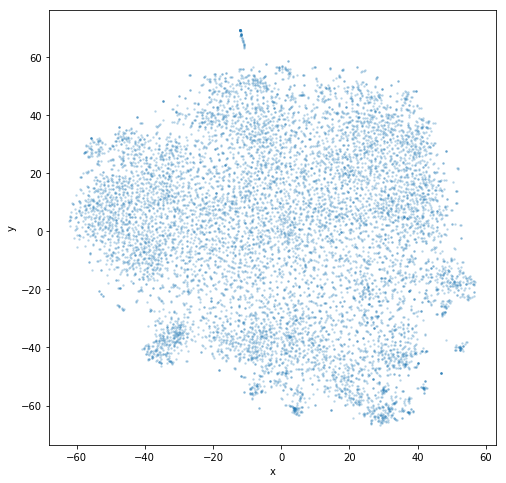

In [43]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8, 8), marker='.', s=10, alpha=0.2)

In [44]:
output_notebook()

Loading BokehJS ...

In [45]:
subset_df = coords_df.sample(n=5000)

In [46]:
p = figure(plot_width=600, plot_height=600)
_ = p.text(x=subset_df.x, y = subset_df.y, text=subset_df.token)

In [50]:
show(p)

In [51]:
# to share the output in HTML for others to explore the findings
# this output_file() can be found in bokeh 
output_file()